In [7]:
# !pip install "numpy<2.0"

In [8]:
# !pip install sweetviz ydata-profiling

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/kaggle/input/churnn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [11]:
churn = df

In [12]:
churn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [13]:
churn.shape

(7043, 21)

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# from ydata_profiling import ProfileReport

In [16]:
# profile = ProfileReport(
#     churn,
#     title='Initial EDA Analysis',
#     explorative=True,
#     minimal=False
# )
# profile.to_file('eda_report.html')

In [17]:
# import sweetviz as sv
# report = sv.analyze(churn, target_feat="Churn")
# report.show_html("sweetviz_report.html")

###Tenure vs Churn

Text(0.5, 1.0, 'Tenure vs Churn')

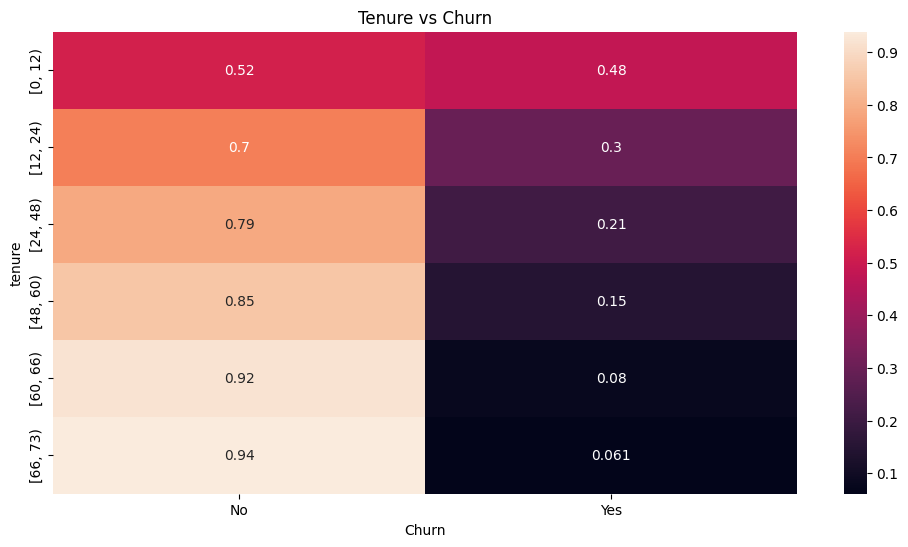

In [18]:
bins = [0, 12, 24, 48, 60, 66, 73] # Tenures
cmt = pd.crosstab(
    pd.cut(churn['tenure'], bins=bins, right=False),
    churn['Churn'],
    normalize='index'
)
plt.figure(figsize=(12, 6))
sns.heatmap(cmt, annot=True)
plt.title('Tenure vs Churn')

### Monthly Charges vs Churn

Text(0.5, 1.0, 'Monthly Charges vs Churn')

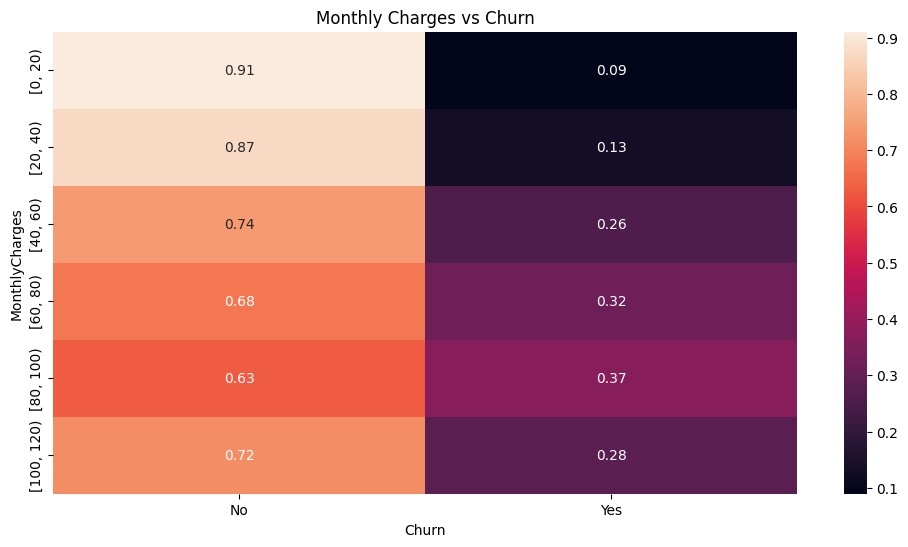

In [19]:
bins = [0, 20, 40, 60, 80, 100, 120] # Monthly Charges

cmt = pd.crosstab(
    pd.cut(churn['MonthlyCharges'], bins=bins, right=False),
    churn['Churn'],
    normalize='index'
)
plt.figure(figsize=(12, 6))
sns.heatmap(cmt, annot=True)
plt.title('Monthly Charges vs Churn')

## EDA REPORT
1. Executive Summary
--------------------
I analyzed the Telco Customer Churn dataset with 7,043 rows and 21 columns.

- Target Variable: Churn (Yes / No)
- Missing Values: None
- Duplicates: 0 rows
- Data Health: Overall clean, but the target is imbalanced (~73.5% No, ~26.5% Yes)

I plan to address class imbalance during modeling using techniques such as class weights or SMOTE.

---

2. Deep Analysis & EDA
---------------------

A. Target Variable: Churn
- Distribution: No ~73.5%, Yes ~26.5%
- Insight: The dataset is imbalanced. I should account for this in my modeling to avoid bias toward predicting "No Churn".

B. Customer Demographics
- Gender: Roughly 50/50 split; gender alone is not a strong churn driver.
- Senior Citizen: ~16% senior, 84% non-senior.
- Partner & Dependents:
    - ~52% without partners
    - ~70% without dependents
- Insight: Customers without partners or dependents are more mobile and have higher churn risk.

C. Services Subscribed
- Phone Service: ~90% of customers
- Internet Service:
    - Fiber Optic (44%) — high churn, likely due to cost or technical issues
    - DSL (34%) — more stable
    - No Internet (22%) — lowest churn
- Streaming/Support Services:
    - OnlineSecurity, TechSupport, StreamingTV correlate with MonthlyCharges
    - Customers without OnlineSecurity/TechSupport churn more

D. Contract & Payment
- Contract Type:
    - Month-to-month (55%) — highest churn
    - One-year (21%), Two-year (24%) — more stable
- Payment Method:
    - Electronic Check (33.6%) — highest churn
    - Paperless Billing ~59%
- Insight: Month-to-month and Electronic Check are key churn drivers.

E. Numerical Features
- Tenure:
    - Range 0–72 months
    - Low-tenure customers churn more
- Monthly Charges: High charges correlate with churn, mostly Fiber Optic users

---

3. Key Associations & Correlations
---------------------------------
- Contract ↔ Tenure: Long-term contracts → higher tenure
- MonthlyCharges ↔ Services: Fiber Optic, StreamingTV, MultipleLines drive up charges
- Churn correlations:
    - Positive: Month-to-month contracts, Electronic Check, Fiber Optic, High MonthlyCharges.
    - Negative: High tenure -> Two-year contracts, TechSupport, OnlineSecurity

---

4. Strategic Insights & Recommendations
---------------------------------------
1. Focus on Month-to-Month Customers:
   - Action: Offer discounts or perks to migrate to long-term contracts.

2. Address Electronic Check Pain Point:
   - Action: Encourage auto-pay or card payments via incentives.

3. Promote “Sticky” Services:
   - Action: Bundle OnlineSecurity and TechSupport with Fiber Optic plans.

4. Onboard New Customers (0–12 months):
   - Action: Check in after 1 and 3 months to reduce early churn.

## Data Cleaning

### Removing Unnecessary columns

In [20]:
pd.concat(
    [(churn['tenure'] * churn['MonthlyCharges']).rename('NewTotalCharges'),
     churn['TotalCharges']],
    axis=1
)

,NewTotalCharges,TotalCharges
0,29.85,29.85
1,1936.30,1889.5
2,107.70,108.15
3,1903.50,1840.75
4,141.40,151.65
...,...,...
7038,2035.20,1990.5
7039,7430.40,7362.9
7040,325.60,346.45
7041,297.60,306.6


In [21]:
churn.drop(columns=['customerID', 'TotalCharges'], inplace=True)

- Since TotalCharges is almost corelated with (Tenure $\times$ MonthlyCharges),  Dropping it reduces noise and prevents overfitting without losing any real information.
- Dropping 'customerID' Column as well.

### Change Data Type:
 - Convert categorical object/integer columns to category for memory & ML efficiency

In [22]:
cols = list(churn.columns)
for col in cols:
  if churn[col].nunique() < 5 and churn[col].dtype in ['int64', 'object', 'float64']:
    churn[col] = churn[col].astype('category')

In [23]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

### Removing Categorical Noise Features using Chi-Square test

In [24]:
from scipy.stats import chi2_contingency

In [25]:
cat_cols = churn.select_dtypes(include=['category']).columns.drop('Churn')

In [26]:
for col in cat_cols:
  table = pd.crosstab(churn['Churn'], churn[col])
  chi, p_val, dof, expected = chi2_contingency(table)
  if p_val >= 0.05:  # if p_val < 0.05 then we will keep that col.
    churn.drop(col, inplace=True, axis=1)

In [27]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7043 non-null   category
 1   Partner           7043 non-null   category
 2   Dependents        7043 non-null   category
 3   tenure            7043 non-null   int64   
 4   MultipleLines     7043 non-null   category
 5   InternetService   7043 non-null   category
 6   OnlineSecurity    7043 non-null   category
 7   OnlineBackup      7043 non-null   category
 8   DeviceProtection  7043 non-null   category
 9   TechSupport       7043 non-null   category
 10  StreamingTV       7043 non-null   category
 11  StreamingMovies   7043 non-null   category
 12  Contract          7043 non-null   category
 13  PaperlessBilling  7043 non-null   category
 14  PaymentMethod     7043 non-null   category
 15  MonthlyCharges    7043 non-null   float64 
 16  Churn             7043 n

- Features like 'Gender' and 'PhoneService' do not contribute in prediction as they are noise. So they are not removed.

### Removing Numerical Noise Features using t independent test

In [28]:
from scipy.stats import ttest_ind, levene
num_cols = churn.select_dtypes(include=['int64', 'float64'])
useful_num_cols = []
for num_col in num_cols:
  group1 = churn[churn['Churn'] == 0][num_col]
  group2 = churn[churn['Churn'] == 1][num_col]
  stat, p = levene(group1, group2)
  t_test, p_val = ttest_ind(group1, group2, equal_var=(p>0.05))  # if equal_var -> use levene test else welsh test
  if p_val >= 0.05:
    churn.drop(col, inplace=True, axix=1)


/tmp/ipykernel_47/1258195847.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = levene(group1, group2)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [29]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7043 non-null   category
 1   Partner           7043 non-null   category
 2   Dependents        7043 non-null   category
 3   tenure            7043 non-null   int64   
 4   MultipleLines     7043 non-null   category
 5   InternetService   7043 non-null   category
 6   OnlineSecurity    7043 non-null   category
 7   OnlineBackup      7043 non-null   category
 8   DeviceProtection  7043 non-null   category
 9   TechSupport       7043 non-null   category
 10  StreamingTV       7043 non-null   category
 11  StreamingMovies   7043 non-null   category
 12  Contract          7043 non-null   category
 13  PaperlessBilling  7043 non-null   category
 14  PaymentMethod     7043 non-null   category
 15  MonthlyCharges    7043 non-null   float64 
 16  Churn             7043 n

- All the numerical Features contributes in the prediction, so no one is removed

In [30]:
churn.sample(3)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
2472,0,Yes,No,67,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),70.90,No
3776,0,Yes,No,43,No,DSL,No,No,No,No,Yes,No,One year,Yes,Mailed check,56.35,No
5255,0,No,No,31,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.05,No


In [31]:
X = churn.iloc[:,:-1]
y = churn.iloc[:, -1]

### Data Splitting

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Deciding Preprocessing

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

In [35]:
numerical_features = ['tenure', 'MonthlyCharges']
nominal_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
ordinal_features = ['Partner', 'Dependents', 'PaperlessBilling']
pass_through_features = ['SeniorCitizen']

In [36]:
numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

In [37]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numerical_features),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_features),
        ('ord', OrdinalEncoder(), ordinal_features),
        ('pass', 'passthrough', pass_through_features)
    ],
    remainder='drop'
)

## Pipeline Design per Model

### Logistic Regression Pipeline

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [39]:
model = Pipeline(
    steps=[('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))]
)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [40]:
y_predict = model.predict(X_test)

In [41]:
print("Model Accuracy (Initial) {}: ".format(accuracy_score(y_test, y_predict)))

Model Accuracy (Initial) 0.7444996451383961: 


 * Hyper-Parameter Tuning

In [42]:
param_grid = [
    {
        'classifier__solver': ['liblinear'],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10],
        'classifier__class_weight': [None, 'balanced'],
        'preprocessor__num__poly__degree': [1, 2]
    },
    {
        'classifier__solver': ['saga'],
        'classifier__penalty': ['elasticnet'],
        'classifier__l1_ratio': [0.3, 0.5, 0.7],
        'classifier__C': [0.1, 1],
        'classifier__class_weight': [None, 'balanced'],
        'preprocessor__num__poly__degree': [1, 2]
    }
]


In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MultipleLines',
                                                                          'InternetS...
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear'],
                          'preprocessor__num__poly__degree': [1, 2]},
                         {'classifier__C': [0.1, 1],
                          'classifier__class_weight': [None, 'balanced'],
                          'classifier__l1_ratio': [0.3, 0.5, 0.7],
                          'classifier__penalty': ['elasticnet'],
                          'classifier__solver': ['saga'],
                          'preprocessor__num__poly__degree': [1, 2]}],
             scoring='roc_auc')

In [44]:
grid_search.best_params_

{'classifier__C': 10,
 'classifier__class_weight': None,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear',
 'preprocessor__num__poly__degree': 2}

- **Using the best Parameters, We are creating our Final Model.**

In [45]:
model_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C=0.1,
        penalty='l1',
        solver='liblinear',
        class_weight=None
    ))
])
model_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [46]:
y_predict = model_final.predict(X_test)

In [47]:
confusion_matrix(y_test, y_predict)

array([[935, 100],
       [180, 194]])

* Threshold Tuning:
  - Recall increases when the model predicts “Yes” more easily.
  - By default, models predict "Churn" if the probability is > 0.5.
  - Lower the threshold from 0.5 to 0.26
  - This means if the model is even 26% sure they will churn, we flag them.

In [78]:
y_probab = model_final.predict_proba(X_test)[:,1]
y_pred_lr = np.where(y_probab >= 0.26, 'Yes', 'No')

In [79]:
print("Accuracy when using best Parameters: {}".format(accuracy_score(y_test, y_pred_lr)))

Accuracy when using best Parameters: 0.7402413058907026


In [80]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_test,
        y_pred_lr,
        labels=['Yes', 'No']
    )
)

              precision    recall  f1-score   support

         Yes       0.51      0.80      0.62       374
          No       0.91      0.72      0.80      1035

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [82]:
accuracy_lr  = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='Yes')
recall_lr    = recall_score(y_test, y_pred_lr, pos_label='Yes')
f1_lr        = f1_score(y_test, y_pred_lr, pos_label='Yes')

In [93]:
print(f"Accuracy : {accuracy_lr:.4f}\n"
    f"Precision: {precision_lr:.4f}\n"
    f"Recall   : {recall_lr:.4f}\n"
    f"F1-score : {f1_lr:.4f}")

Accuracy : 0.7402
Precision: 0.5068
Recall   : 0.8021
F1-score : 0.6211


**Model Evaluation Insights**

**Recall: 0.80 (The "Net")**  
- **Meaning:** Out of all the customers who actually churned (374 people), our model successfully identified 80% of them.  
- **Business Impact:** This is strong performance. We are only missing 20% of at-risk customers — the "Safety Net" is effectively working.  

**Precision: 0.51 (The "False Alarm" Rate)**  
- **Meaning:** When the model predicts "This customer will churn!", it is only correct 51% of the time.  
- **Trade-off:** To achieve high Recall, the model becomes "paranoid" and flags many loyal customers as at-risk.  
- **Business Impact:** If we send costly retention offers (e.g., "50% off next bill") to all predicted churners, we may waste resources on customers who weren’t going to leave.  

**The "No" Row (Loyal Customers)**  

**Precision: 0.91 (Trustworthiness)**  
- **Meaning:** If the model says "This customer is Safe (No)", there is a 91% chance they truly are safe.  
- **Business Impact:** Customers labeled as "No" can be safely ignored, reducing unnecessary retention spending.


**Conclusion & Recommendations**

Our current model strategy depends entirely on the company's budget and how much "pain" a lost customer causes compared to the cost of a retention offer.

---

**1. Scenario A: High Budget (Prioritize Recall)**

- **Philosophy:** "Losing a customer costs us much more than giving away a discount."  
- **Recommendation:** If the company has the budget to be aggressive, we should prioritize **Recall**. It is better to accidentally give a discount to a happy customer (False Positive) than to let a churner leave unnoticed (False Negative).  
- **Current Status:** This is our current approach. With a Recall of **0.80**, we are successfully catching 80% of at-risk customers, ensuring maximum retention.

---

**2. Scenario B: Limited Budget (Prioritize Precision)**

- **Philosophy:** "We cannot afford to waste money on customers who aren't leaving."  
- **Recommendation:** If resources are tight, we should prioritize **Precision**. We would need to set the probability threshold strictly to **0.5** (or higher). This ensures that when we spend money on a customer, we are almost certain they were actually at risk, minimizing wasted retention offers.

---

**3. Scenario C: Balanced Approach (Best F1-Score)**

- **Philosophy:** "We want the best of both worlds."  
- **Recommendation:** To improve our **F1-Score**, which balances Precision and Recall, we likely need to move beyond linear models like Logistic Regression. A **Random Forest Classifier** would be the ideal next step. It can capture complex, non-linear patterns in the data, potentially reducing False Alarms without compromising Recall. This approach would help us retain at-risk customers efficiently while keeping costs reasonable.

- **Updated Preprocessing Pipeline for Decision Tree and Random Forest**

In [52]:
preprocessor_tree = ColumnTransformer(
    transformers = [
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_features),
        ('ord', OrdinalEncoder(), ordinal_features),
        ('pass', 'passthrough', pass_through_features)
    ],
    remainder='drop'
)

### Decision Tree Pipeline



In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt_model = Pipeline(steps=[
    ('preprocessing', preprocessor_tree),
    ('classifier', DecisionTreeClassifier(random_state=42))]
)
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [55]:
y_predict_tree = dt_model.predict(X_test)

In [56]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_predict_tree)))

Accuracy Score: 0.7267565649396736


In [57]:
y_predict_train = dt_model.predict(X_train)

In [58]:
print("Accuracy Score for train Data: {}".format(accuracy_score(y_train, y_predict_train)))

Accuracy Score for train Data: 0.9052183173588925


- Decision Tree is clearly overfitting, Using Random Forest.

### Random Forest Pipeline

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight='balanced'
    ))
]
)
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling']),
                                                 ('pass', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

In [60]:
y_pred_rf = rf_model.predict(X_test)

In [61]:
print(
    classification_report(
        y_test,
        y_pred_rf,
        labels=['Yes', 'No']
    )
)

              precision    recall  f1-score   support

         Yes       0.62      0.49      0.55       374
          No       0.83      0.89      0.86      1035

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



### HyperParamter Tuning

In [62]:
param_grid = {
    'classifier__n_estimators': [500, 1000],
    'classifier__max_depth': [6],
    'classifier__min_samples_leaf': [30],
    'classifier__max_features': ['sqrt', 0.5],
    'classifier__class_weight': ['balanced']
}

In [63]:
from sklearn.metrics import make_scorer
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score, pos_label='Yes')
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MultipleLines',
                                                                          'InternetS...
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_estimators=300,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__max_depth': [6],
                         'classifier__max_features': ['sqrt', 0.5],
                         'classifier__min_samples_leaf': [30],
                         'classifier__n_estimators': [500, 1000]},
             scoring=make_scorer(recall_score, pos_label=Yes), verbose=1)

In [64]:
grid_search_rf.best_score_

0.7966555183946489

In [65]:
grid_search_rf.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 6,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 30,
 'classifier__n_estimators': 1000}

In [66]:
y_pred_grid_search_rf = grid_search.predict(X_test)

In [67]:
print("-------------Report for the Test Data------------------ ")
print(
    classification_report(
        y_test,
        y_pred_grid_search_rf,
        labels=['Yes', 'No']
    )
)

-------------Report for the Test Data------------------ 
              precision    recall  f1-score   support

         Yes       0.66      0.52      0.58       374
          No       0.84      0.90      0.87      1035

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [68]:
y_pred_grid_search_rf_train = grid_search_rf.predict(X_train)

In [69]:
print("-------------Report for the Train Data------------------ ")
print(
    classification_report(
        y_train,
        y_pred_grid_search_rf_train,
        labels=['Yes', 'No']
    )
)

-------------Report for the Train Data------------------ 
              precision    recall  f1-score   support

         Yes       0.53      0.82      0.65      1495
          No       0.92      0.74      0.82      4139

    accuracy                           0.76      5634
   macro avg       0.73      0.78      0.73      5634
weighted avg       0.82      0.76      0.77      5634



In [70]:
y_probab = grid_search_rf.predict_proba(X_test)[:,1]
y_pred_new_rf = np.where(y_probab >= 0.47, 'Yes', 'No')

In [71]:
print("-------------Report for the New Test Data------------------ ")
print(
    classification_report(
        y_test,
        y_pred_new_rf,
        labels=['Yes', 'No']
    )
)

-------------Report for the New Test Data------------------ 
              precision    recall  f1-score   support

         Yes       0.50      0.82      0.62       374
          No       0.91      0.70      0.80      1035

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409



In [73]:
accuracy_rf  = accuracy_score(y_test, y_pred_new_rf)
precision_rf = precision_score(y_test, y_pred_new_rf, pos_label='Yes')
recall_rf    = recall_score(y_test, y_pred_new_rf, pos_label='Yes')
f1_rf        = f1_score(y_test, y_pred_new_rf, pos_label='Yes')

In [95]:
print(f"Accuracy : {accuracy_rf:.4f}\n"
    f"Precision: {precision_rf:.4f}\n"
    f"Recall   : {recall_rf:.4f}\n"
    f"F1-score : {f1_rf:.4f}")

Accuracy : 0.7339
Precision: 0.4992
Recall   : 0.8155
F1-score : 0.6193


In [96]:
data = {
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Random Forest':       [accuracy_rf, precision_rf, recall_rf, f1_rf]
}
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

In [98]:
df = pd.DataFrame(data, index=metrics)

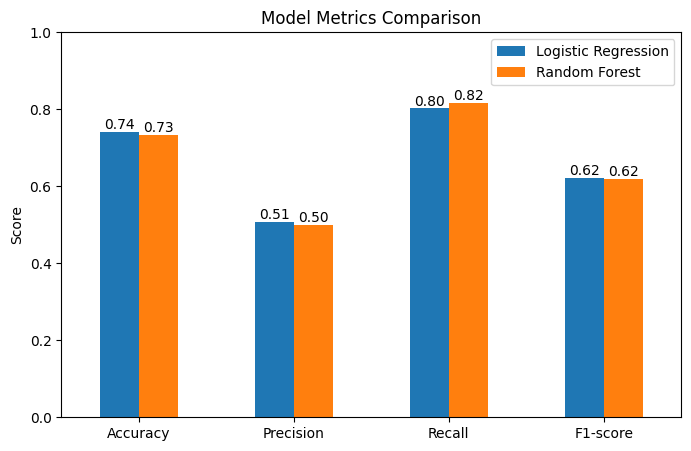

In [100]:
ax = df.plot(kind='bar', figsize=(8,5))
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Model Metrics Comparison')
plt.xticks(rotation=0)

# 🔹 Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()
